#### Imports

In [12]:
# import cartopy.crs as ccrs
# import cartopy.feature as cfeature
# import matplotlib.pyplot as plt
# import netCDF4 as nc
# import numpy as np
# import os
# import pandas as pd
# import xarray as xr
import glob
# from cartopy.io.shapereader import Reader
# from matplotlib.projections.polar import PolarAxes
# from scipy.interpolate import interp1d
# from scipy.integrate import quad
# from scipy.stats import linregress, weibull_min
# from sklearn.linear_model import LinearRegression
# from sklearn.metrics import mean_absolute_error, mean_squared_error
# from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import StandardScaler
# from windrose import WindroseAxes

# Custom libraries
import data_loading
import plotting
import netcdf_exploration
import data_analysis
import era5_analysis
import foxes_analysis

#### Booleans to decide what to plot/compute

In [13]:
plot_wind_farm_data = 1
plot_wind_farm_data_zoomed = 1

#### Paths

In [14]:
# Base paths
measurements_path = 'data/measurements/'
turbine_info_path = 'data/turbine-info/coordinates/'
turbine_power_curves_path = 'data/turbine-info/power_curves/'
shapefiles_path = 'data/shapefiles/'
era5_path = 'data/reanalysis/'

# Buoy NetCDF files
bouy6_path = f'{measurements_path}2023-11-06_Buoy6_BSH_N-9.nc'
bouy2_path = f'{measurements_path}2023-11-09_Buoy2_BSH_N-9.nc'
# Windfarm layout base paths
turbines_existing_path = f'{turbine_info_path}existing/'
turbines_planned_future_path = f'{turbine_info_path}planned_future/'
turbines_planned_in_operation_before_2030_path = f'{turbine_info_path}planned_in_operation_before_2030/'
turbines_planned_netherlands_path = f'{turbine_info_path}planned_netherlands/'
turbines_area_of_interest_path = f'{turbine_info_path}area_of_interest/'
# Countries Shapefiles paths
shapefiles_DEU_path = f'{shapefiles_path}DEU/DEU_adm1.shp'
shapefiles_DNK_path = f'{shapefiles_path}DNK/gadm36_DNK_1.shp'
shapefiles_NLD_path = f'{shapefiles_path}NLD/gadm36_NLD_1.shp'

# Wind field layout files
file_N9_1 = f'{turbines_area_of_interest_path}layout-N-9.1.geom.csv'
file_N9_2 = f'{turbines_area_of_interest_path}layout-N-9.2.geom.csv'
file_N9_3 = f'{turbines_area_of_interest_path}layout-N-9.3.geom.csv'

# Existing turbines
existing_files = glob.glob(f'{turbines_existing_path}*.csv')
# Planned future turbines
planned_future_files = glob.glob(f'{turbines_planned_future_path}*.csv')
# Turbines planned to be in operation before 2030
planned_before_2030_files = glob.glob(f'{turbines_planned_in_operation_before_2030_path}*.csv')
# Planned turbines in the Netherlands
planned_netherlands_files = glob.glob(f'{turbines_planned_netherlands_path}*.csv')


#### Data Loading

In [15]:
# Load NetCDF buoy datasets
xrbuoy6, xrbuoy2, buoy2_file, buoy6_file = data_loading.datasets(bouy6_path, bouy2_path)

# Load Wind field layout CSV data
data_N9_1, data_N9_2, data_N9_3 = data_loading.csv_files(file_N9_1, file_N9_2, file_N9_3)

# Load other windfarm data
existing_data = data_loading.other_windfarm_data(existing_files)
planned_future_data = data_loading.other_windfarm_data(planned_future_files)
planned_before_2030_data = data_loading.other_windfarm_data(planned_before_2030_files)
planned_netherlands_data = data_loading.other_windfarm_data(planned_netherlands_files)

other_wind_farm_data = existing_data + planned_future_data + planned_before_2030_data + planned_netherlands_data

#### 1. Set the Turbine Design: 
- International Energy Agency (IEA) for a 15 MW offshore wind turbine
- Turbine name: IEA-15MW-D240-H150
-rotor diameter:  240 meters
- hub height: 150 meters

With that we say the height of interest is the one, nearest on the hub height: 140 m 


#### 2. Plot the field of interest together with the lidar measurement buoy positions


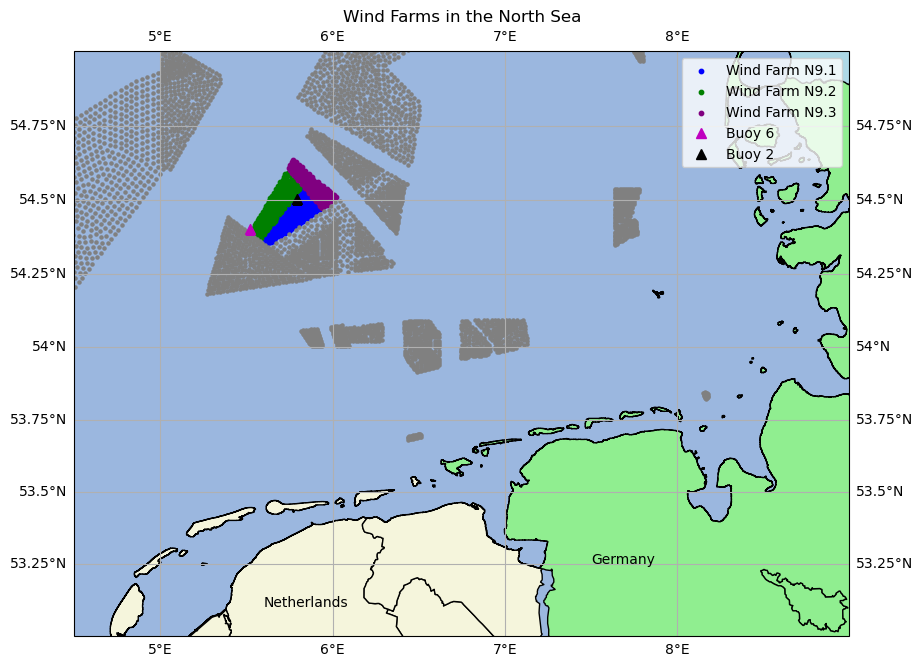

In [16]:
if plot_wind_farm_data:
    plotting.plot_wind_farms_and_buoys(shapefiles_path, data_N9_1, data_N9_2, data_N9_3, other_wind_farm_data)

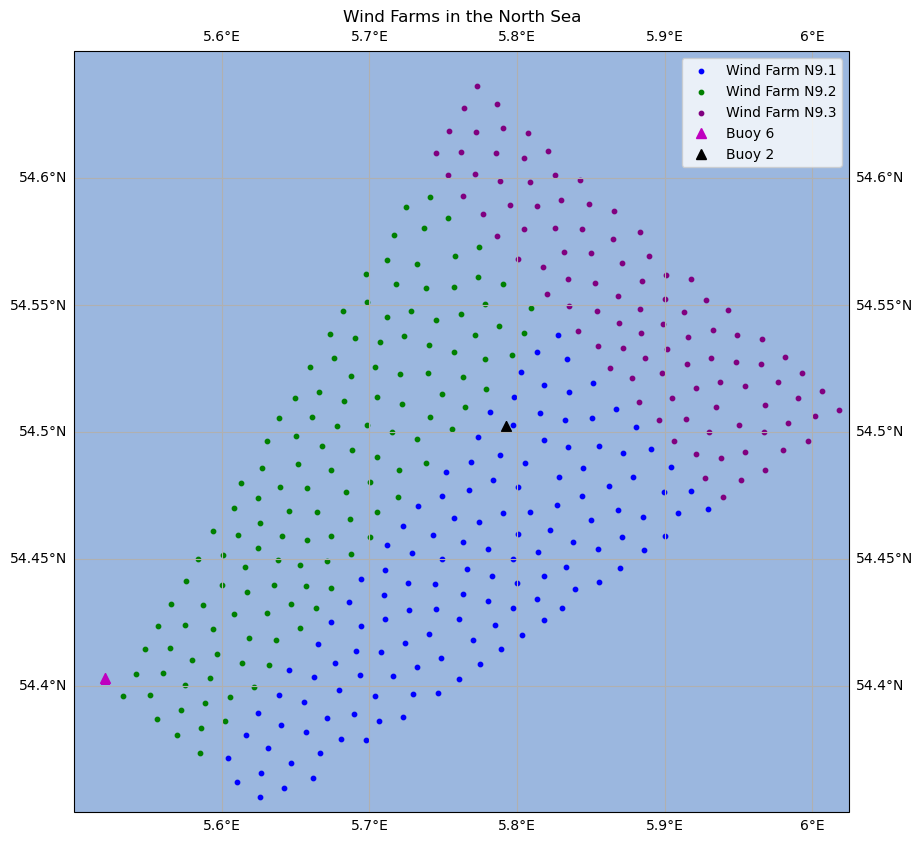

In [17]:
if plot_wind_farm_data_zoomed:
    plotting.plot_wind_farms_and_buoys_zoomed(data_N9_1, data_N9_2, data_N9_3)

#### 3. Explore the structure and variables inside the  2 ncfiles

In [18]:
netcdf_exploration.overview(buoy2_file)

TopGroup Nr. 1: ZX_LIDAR_WLBZ_2
TopGroup Nr. 2: METEO_WLBZ_2
TopGroup Nr. 3: ADD_DATA_WLBZ_2
TopGroup Nr. 4: ZX_LIDAR_WLBZ_6_MCP
TopGroup Nr. 5: METEO_WLBZ_6_MCP
---------------------------------------------------------
TopGroup: ZX_LIDAR_WLBZ_2
    Groupvariable: wind_speed
    Groupvariable: wind_from_direction
    Groupvariable: wind_from_direction_availability
    Groupvariable: wind_speed_availability
    Groupvariable: wind_speed_min
    Groupvariable: wind_speed_max
    Groupvariable: wind_speed_stddev
    Groupvariable: wind_count
    Groupvariable: turbulence_intensity
    Groupvariable: algorithm_bitmask
TopGroup: METEO_WLBZ_2
        Subgroup: Vaisala Weather Station
            SubGroupVariable: rain_accumulation
            SubGroupVariable: rain_accumulation_calculated
            SubGroupVariable: rain_duration
            SubGroupVariable: rain_intensity
            SubGroupVariable: hail_accumulation
            SubGroupVariable: hail_duration
            SubGroupVaria

In [19]:
netcdf_exploration.topgroup_variables(buoy2_file,'ZX_LIDAR_WLBZ_2')

Variable Name: wind_speed
Variable Attributes:
    Units: m/s
    Long Name: Wind speed
    Shape: (67680, 1, 1, 6)
---------------------------------------------------------
Variable Name: wind_from_direction
Variable Attributes:
    Units: degree
    Long Name: Horizontal wind direction
    Shape: (67680, 1, 1, 6)
---------------------------------------------------------
Variable Name: wind_from_direction_availability
Variable Attributes:
    Units: percent
    Long Name: Availability of the horizontal wind direction
    Shape: (67680, 1, 1, 6)
---------------------------------------------------------
Variable Name: wind_speed_availability
Variable Attributes:
    Units: percent
    Long Name: Availability of the horizontal wind speed
    Shape: (67680, 1, 1, 6)
---------------------------------------------------------
Variable Name: wind_speed_min
Variable Attributes:
    Units: m/s
    Long Name: Minimum wind speed
    Shape: (67680, 1, 1, 6)
----------------------------------------

In [20]:
netcdf_exploration.topgroup_variables(buoy2_file, 'ZX_LIDAR_WLBZ_6_MCP')

Variable Name: wind_from_direction
Variable Attributes:
    Units: degree
    Long Name: Measure correlate predict corrected wind direction data from dataset ZX_LIDAR_WLBZ_6 measured by WLBZ_6.
    Shape: (67680, 1, 1, 6)
---------------------------------------------------------
Variable Name: wind_speed
Variable Attributes:
    Units: m/s
    Long Name: Measure correlate predict corrected wind speed data from dataset ZX_LIDAR_WLBZ_6 measured by WLBZ_6).
    Shape: (67680, 1, 1, 6)
---------------------------------------------------------


In [21]:
netcdf_exploration.sub_groups(buoy2_file, 'METEO_WLBZ_2')

SUBGROUP: Vaisala Weather Station
Variable Name: rain_accumulation
Variable Attributes:
    Units: mm
    Long Name: Rain accumulation measured by the Vaisala Weather Station at 3 m above MSL
    Shape: (67680, 1, 1)
---------------------------------------------------------
Variable Name: rain_accumulation_calculated
Variable Attributes:
    Units: mm
    Long Name: Rain accumulation calculated from rain duration and rain intensity data provided by the Vaisala Weather Station at 3 m above MSL
    Shape: (67680, 1, 1)
---------------------------------------------------------
Variable Name: rain_duration
Variable Attributes:
    Units: s
    Long Name: Rain duration measured by the Vaisala Weather Station at 3 m above MSL
    Shape: (67680, 1, 1)
---------------------------------------------------------
Variable Name: rain_intensity
Variable Attributes:
    Units: mm/h
    Long Name: Rain intensity measured by the Vaisala Weather Station at 3 m above MSL
    Shape: (67680, 1, 1)
--------

#### 4. Decide which Data we use for further analytics

In [22]:
time2 = xrbuoy2.variables['time'][:]
windspeed_mcp_buoy2 = buoy2_file.groups['ZX_LIDAR_WLBZ_6_MCP'].variables['wind_speed'][:]
windspeed2 = buoy2_file.groups['ZX_LIDAR_WLBZ_2'].variables['wind_speed'][:]

time6 = xrbuoy6.variables['time'][:]
windspeed_mcp_buoy6 = buoy6_file.groups['ZX_LIDAR_WLBZ_2_MCP'].variables['wind_speed'][:]
windspeed6 = buoy6_file.groups['ZX_LIDAR_WLBZ_6'].variables['wind_speed'][:]

# Creating a figure with 4 subplots arranged in a 2x2 grid
fig, axes = plt.subplots(2, 2, figsize=(13, 8), sharey=True, sharex=True)

axes[0, 0].plot(time6, windspeed6[:, 0, 0, 2])
axes[0, 0].set_title('Buoy 6')
axes[0, 0].set_xlabel('Time')
axes[0, 0].set_ylabel('Wind Speed (m/s)')

axes[0, 1].plot(time2, windspeed2[:, 0, 0, 2])
axes[0, 1].set_title('Buoy 2')
axes[0, 1].set_xlabel('Time')
axes[0, 1].set_ylabel('Wind Speed (m/s)')

axes[1, 0].plot(time6, windspeed_mcp_buoy6[:, 0, 0, 2])
axes[1, 0].set_title('MCP Data buoy 6')
axes[1, 0].set_xlabel('Time')
axes[1, 0].set_ylabel('Wind Speed (m/s)')

axes[1, 1].plot(time2, windspeed_mcp_buoy2[:, 0, 0, 2])
axes[1, 1].set_title('MCP Data buoy 2')
axes[1, 1].set_xlabel('Time')
axes[1, 1].set_ylabel('Wind Speed (m/s)')

# Adjust layout to prevent overlap
plt.tight_layout()

# Display the plots
plt.show()


NameError: name 'plt' is not defined

In [ ]:
# Close all datasets again! 

xrbuoy6.close()
xrbuoy2.close()

buoy2_file.close()
buoy6_file.close()